In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style='white')

In [2]:
path = "../processed/train/evaluated/paraphrase_replaced_adjectives_mistralai_51_EVALUATED_16_02_2024.csv"

In [3]:
df = pd.read_csv(path)

In [4]:
kgw_wm_zscore = np.array(df["kgw-wm-zscore"])
non_wm_zscore = np.array(df["non-wm-zscore"])

In [5]:
no_of_paraphrases = 3
wmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))
nmarked_paraphrased_scores = np.zeros(shape=(no_of_paraphrases, len(kgw_wm_zscore)))

In [6]:
for i in range(1, no_of_paraphrases+1):
    wmarked_paraphrased_scores[i-1] = df[f"kgw-wm-pp-zscore-{i}"]
    nmarked_paraphrased_scores[i-1] = df[f"non-wm-pp-zscore-{i}"]

In [7]:
def comparison(arr_1, arr_2):
    arr_1_mean = arr_1.mean()
    arr_2_mean = arr_2.mean()
    
    arr_1_std = arr_1.std()
    arr_2_std = arr_2.std()
    
    print(f"base mean: {arr_1_mean:.4f}, pp mean: {arr_2_mean:.4f}")
    print(f"base std: {arr_1_std:.4f}, pp mean: {arr_2_std:.4f}")

In [8]:
comparison(kgw_wm_zscore, non_wm_zscore)

base mean: 12.3117, pp mean: 0.1565
base std: 3.1105, pp mean: 1.1822


In [13]:
image_path = "../results/images/z_score_comparisons_february/"

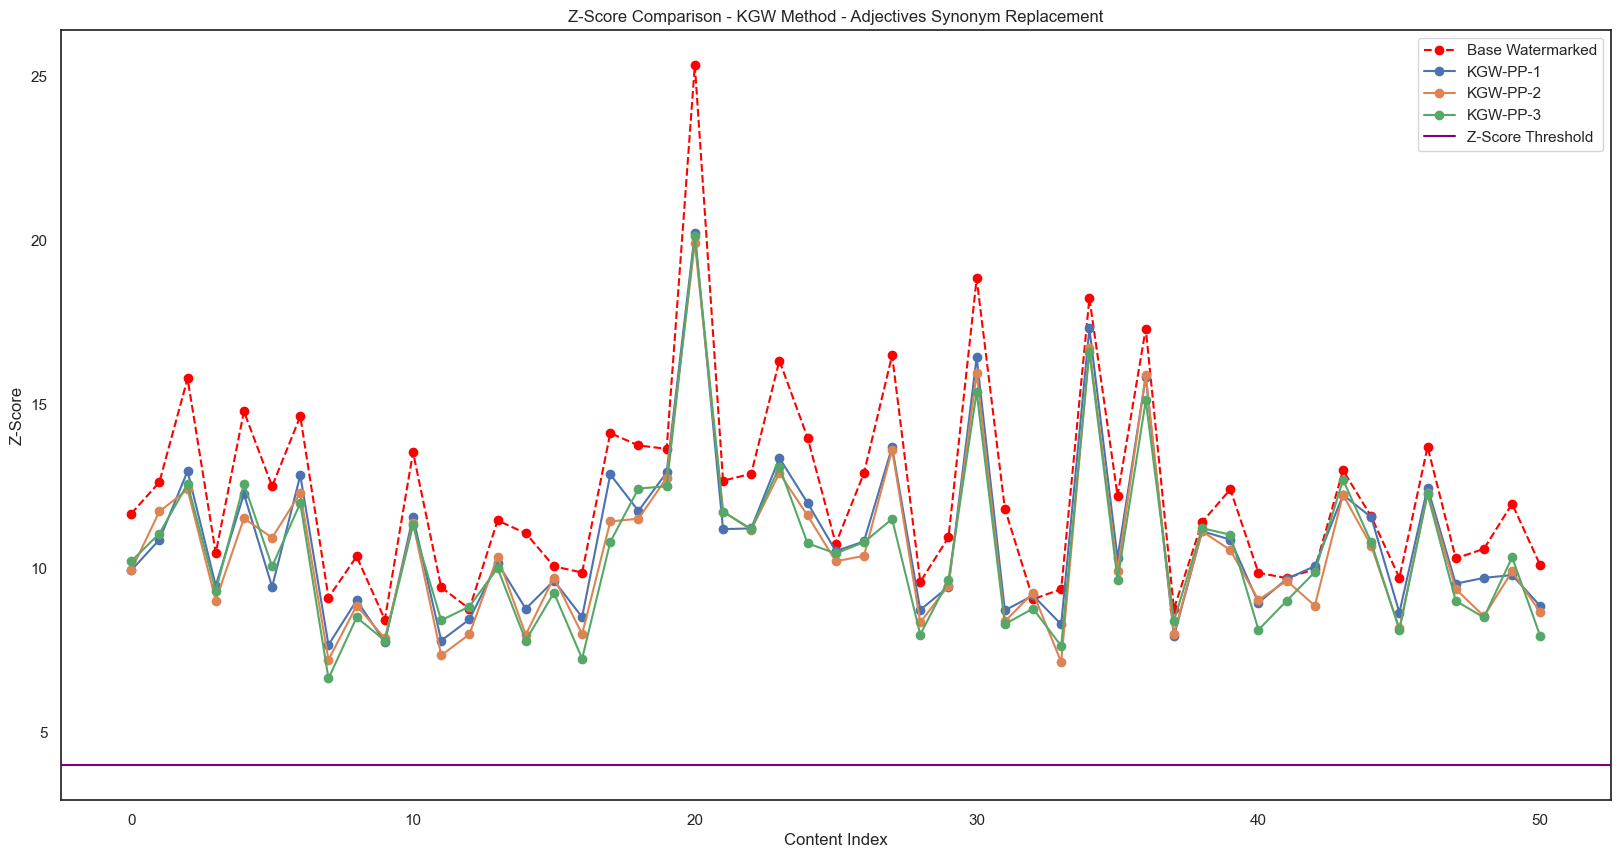

In [15]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(kgw_wm_zscore))), kgw_wm_zscore, label="Base Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(no_of_paraphrases):
    axs.plot(list(range(len(kgw_wm_zscore))), wmarked_paraphrased_scores[i], label=f"KGW-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - KGW Method - Adjectives Synonym Replacement")
axs.legend(loc='upper right')
# plt.savefig(image_path+"word_replaced_kgw.png")
plt.show()

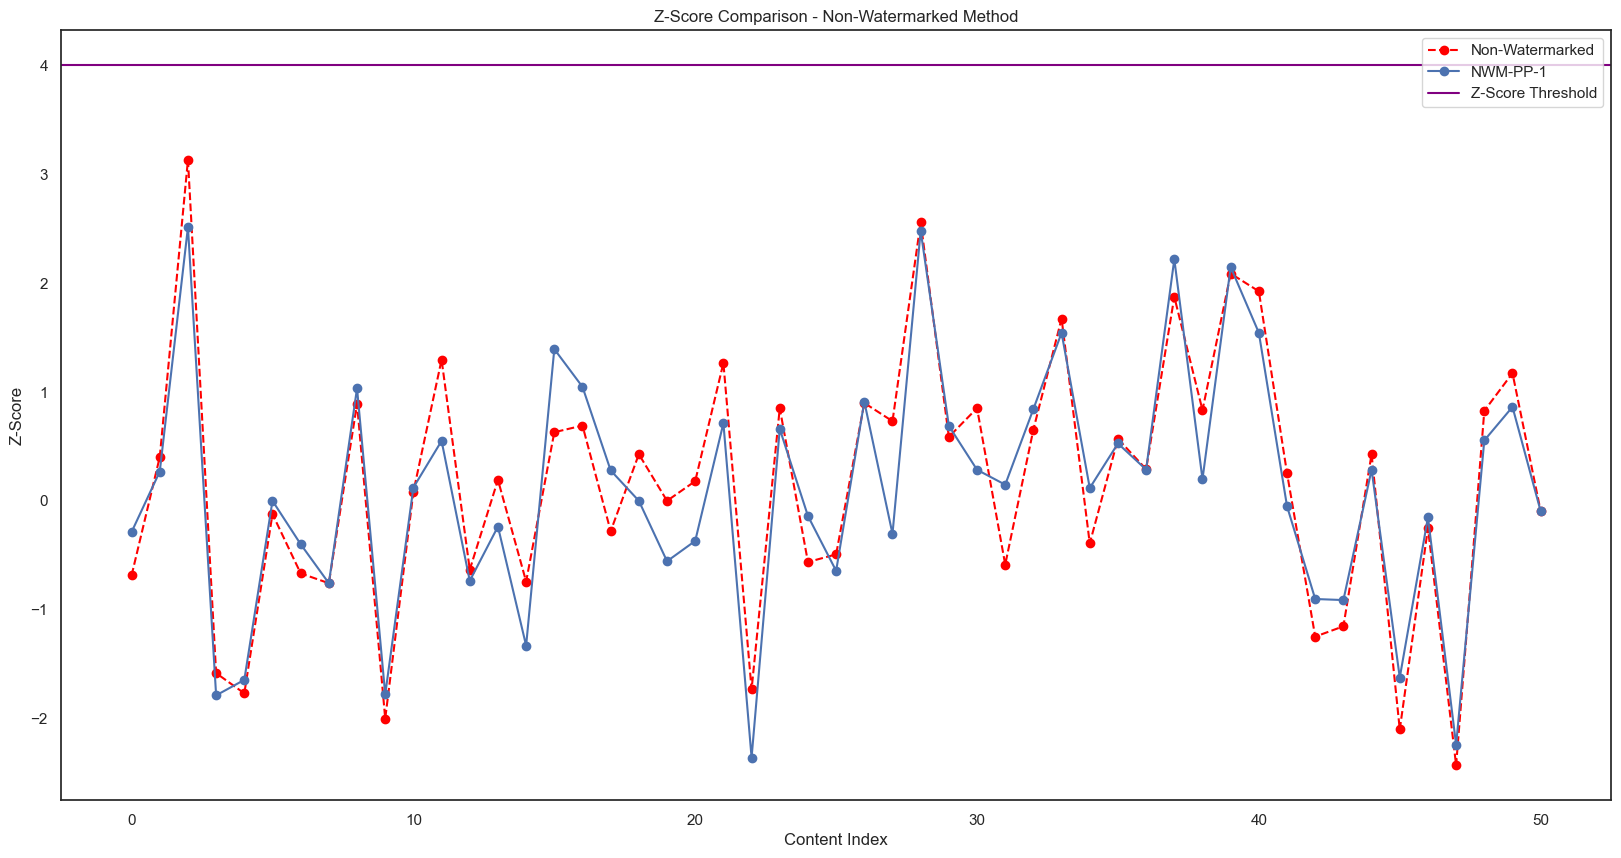

In [11]:
fig, axs = plt.subplots(1,1, figsize=(20,10))

axs.plot(list(range(len(non_wm_zscore))), non_wm_zscore, label="Non-Watermarked", color='red', marker='o', linestyle="dashed")

for i in range(1):
    axs.plot(list(range(len(non_wm_zscore))), nmarked_paraphrased_scores[i], label=f"NWM-PP-{i+1}", marker='o')

axs.axhline(4, color='purple', label="Z-Score Threshold")
axs.set_ylabel("Z-Score")
axs.set_xlabel("Content Index")
axs.set_title("Z-Score Comparison - Non-Watermarked Method")
axs.legend(loc='upper right')
# plt.savefig(image_path+"kgw_zscore_non_wmarked_project.png")
plt.show()

## Scatter Plot Visualisation

In [13]:
df.columns

Index(['id', 'instructions', 'text', 'kgw-watermarked', 'non-watermarked',
       'pp-kgw-1', 'pp-unwatermarked-1', 'pp-kgw-2', 'pp-unwatermarked-2',
       'pp-kgw-3', 'pp-unwatermarked-3', 'kgw-wm-zscore', 'non-wm-zscore',
       'kgw-wm-pp-zscore-1', 'non-wm-pp-zscore-1', 'kgw-wm-pp-zscore-2',
       'non-wm-pp-zscore-2', 'kgw-wm-pp-zscore-3', 'non-wm-pp-zscore-3'],
      dtype='object')

In [14]:
kgw_z_scores = df["kgw-wm-zscore"]
kgw_pp_z_scores = df["kgw-wm-pp-zscore-1"]

In [42]:
np.min(kgw_pp_z_scores)

-0.1166423687039608

In [59]:
import os 
os.getcwd()

'C:\\Users\\Sam\\Desktop\\Level4-Proj\\data\\notebooks'

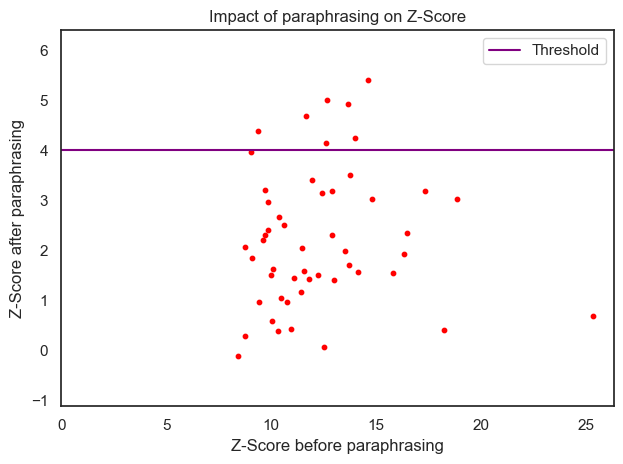

In [91]:
fig, axs = plt.subplots()

axs.scatter(kgw_z_scores, kgw_pp_z_scores, s=15, color='red')

axs.set_xlabel("Z-Score before paraphrasing")
axs.set_ylabel("Z-Score after paraphrasing")

left = min(0, np.min(kgw_z_scores)-1)
right = max(kgw_z_scores)+1
bottom = min(0, np.min(kgw_pp_z_scores)-1)
top = max(kgw_pp_z_scores) + 1

axs.set_xlim(left=left, right=right)
axs.set_ylim(bottom=bottom, top=top)
axs.axhline(4.0, label='Threshold', color='purple')

# axs.axvline(0, c='black', ls='--') 
# axs.axhline(0, c='black', ls='--') 

axs.set_title("Impact of paraphrasing on Z-Score")

plt.legend()
plt.tight_layout()
# plt.savefig("../results/images/mistral-7b-january/scatter-comparison.png", bbox_inches='tight')
plt.show()